## **Car Price Predication**

<b><em> By: Ms. Yashshree Baviskar </em></b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df= pd.read_csv('Car_data.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 10211
No. of Columns : 19


,Car Model,Make Year,Fuel Type,KMs driven,Transmission,Engine Displacement( ),Milage(kmpl),Max Power(bhp),Seating Capacity,Color,Gear Box,Steering Type,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Price(Rs),Brand,Model
0,Maruti SPresso,2020,Petrol,5918,Manual,998,21.7,67.05,5.0,Metallic silky silver,5 Speed,Power,K10B,3.0,NaN,NaN,475000,Maruti,SPresso
1,Honda City,2014,Petrol,32607,Manual,1497,17.4,117.30,5.0,Silver,5 Speed,Power,i VTEC Engine,4.0,No,No,632000,Honda,City
2,Honda BRV,2017,Diesel,47631,Manual,1498,21.9,98.60,7.0,Brown,6 Speed,Power,i DTEC Diesel Engine,4.0,Yes,No,874000,Honda,BRV
3,Maruti BaleNo,2018,Petrol,36289,Manual,1197,21.4,83.10,5.0,Ray blue,5 Speed,Power,VVT Petrol Engine,4.0,No,No,628000,Maruti,BaleNo
4,Hyundai i20,2015,Petrol,70697,Manual,1197,18.6,81.83,5.0,Sleek Silver,5 Speed,Power,Kappa VTVT Petrol Engine,4.0,No,No,520000,Hyundai,i20


In [4]:
# As we have 19 columns lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['KMs driven', 'Engine Displacement( )'], float64: ['Milage(kmpl)', 'Max Power(bhp)', 'Seating Capacity', 'No of Cylinder'], object: ['Car Model', 'Make Year', 'Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Price(Rs)', 'Brand', 'Model']}

#### Observation:
- **This dataset contain 10211 rows and 17 columns.**
- **We have lot feature here with object datatypes which actually have to be integer type.**
- **Our target feature is Price.**

## Data Cleaning and Preprocessing

**1. Transfoming datatypes of 'Milage(kmpl)' into float type.**

- **Modifications needed** 
    - **Change dtypes into int from float**

In [5]:
df['Milage(kmpl)'] = pd.to_numeric(df['Milage(kmpl)'])

In [6]:
df['Milage(kmpl)'].dtypes

dtype('float64')

**2. Transfoming datatypes of Max Power into float type.**

In [7]:
df['Max Power(bhp)'] = pd.to_numeric(df['Max Power(bhp)'])

In [8]:
df['Max Power(bhp)'].dtypes

dtype('float64')

**3. Transfoming datatypes of Price(Rs) into float type.**

In [9]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Lakh*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Crore*','10000000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace(',','')

In [10]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('*','')

In [11]:
df[['a','b']] = df['Price(Rs)'].str.split(expand=True)
df['a'] = df['a'].astype("float")
df['b'] = df['b'].astype("float")

In [12]:
df['b'] = df['b'].fillna(value = 1)
df["Price (Rs.)"] = df['a'] * df['b']

In [13]:
df.drop(columns=['Price(Rs)','a','b'], inplace = True)

**4. Transfoming datatypes of Seating capacity into float type.**

In [14]:
df['Seating Capacity'] = df['Seating Capacity'].replace('-','')

In [15]:
df['Seating Capacity'] = pd.to_numeric(df['Seating Capacity'])

In [16]:
df['Seating Capacity'].dtypes

dtype('float64')

**5. Feature Engineering on Make Year column to extract Age of Car**

In [17]:
df.replace('np.nan', np.nan, inplace = True)

In [18]:
df['Make Year']  = pd.to_numeric(df['Make Year'])

In [19]:
df['Car_Age'] = 2022 - df['Make Year'] 

In [20]:
df.drop(columns=['Make Year'], inplace = True)

### **Data Integrity Check**

- **Dropping duplicates entries from dataset.**

In [21]:
df.duplicated().sum() # This will detect duplicate entries in dataset

1711

In [22]:
# Droping duplicate entries
df.drop_duplicates(keep='last', inplace =True)

In [23]:
df.shape

(8500, 19)

- **Check for presense of missing values in dataset.**

In [24]:
df.isnull().sum()

Car Model                    0
Fuel Type                  405
KMs driven                   0
Transmission              5302
Engine Displacement( )       0
Milage(kmpl)               550
Max Power(bhp)             704
Seating Capacity          2244
Color                      427
Gear Box                   504
Steering Type             1837
Engine Type               1410
No of Cylinder            1983
Turbo Charger             1377
Super Charger             1695
Brand                        0
Model                        0
Price (Rs.)                  0
Car_Age                   1137
dtype: int64

In [25]:
# Droping unnecesary columns and columns with large missing value
df.drop(columns=['Transmission','Engine Type','Color',"Car Model"], inplace = True)

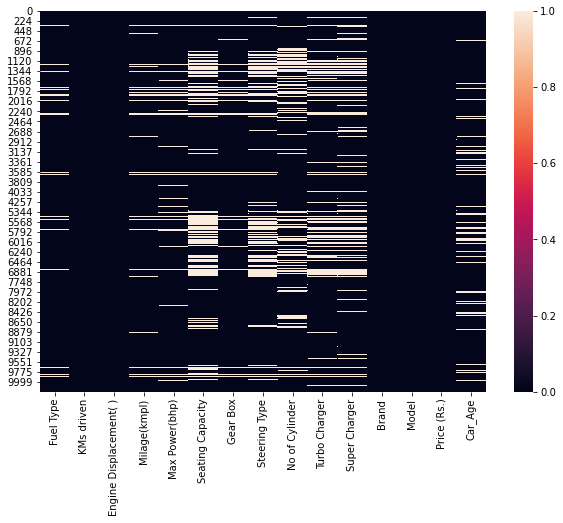

In [26]:
sns.set_palette('cool')
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

In [27]:
df.isnull().sum()

Fuel Type                  405
KMs driven                   0
Engine Displacement( )       0
Milage(kmpl)               550
Max Power(bhp)             704
Seating Capacity          2244
Gear Box                   504
Steering Type             1837
No of Cylinder            1983
Turbo Charger             1377
Super Charger             1695
Brand                        0
Model                        0
Price (Rs.)                  0
Car_Age                   1137
dtype: int64

### Missing value Imputation 
- **Numerical value can be imputate with Mean and Median. We can decide imputation method based on boxplot & Distplot.** 
- **Categorical variable & ordinal variable can be imputate with mode.**

#### Imputation of Categorical variable

In [28]:
# Imputation of Categorical variable or ordinal variable with mode of category
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0],inplace = True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0],inplace = True)
df['Gear Box'].fillna(df['Gear Box'].mode()[0],inplace = True)
df['Steering Type'].fillna(df['Steering Type'].mode()[0],inplace = True)
df['No of Cylinder'].fillna(df['No of Cylinder'].mode()[0],inplace = True)
df['Turbo Charger'].fillna(df['Turbo Charger'].mode()[0],inplace = True)
df['Super Charger'].fillna(df['Super Charger'].mode()[0],inplace = True)

In [29]:
df['Car_Age'].fillna(df['Car_Age'].mode()[0],inplace = True)

#### Imputation of Numerical variable

**1.Impuatation of Missing values in Milage**

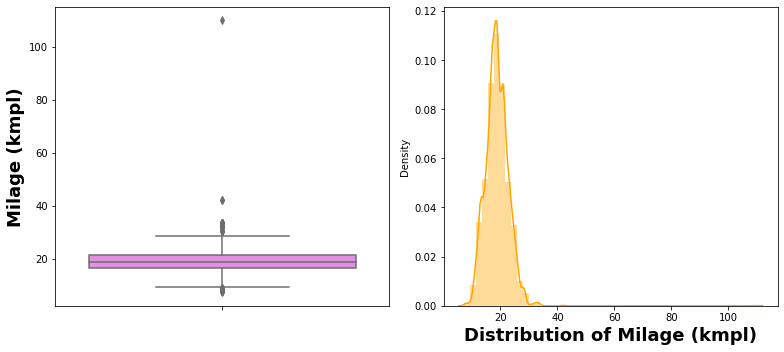

In [30]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
sns.boxplot(y='Milage(kmpl)', data= df, color = 'violet')
plt.ylabel('Milage (kmpl)',fontweight = 'bold',fontsize= 18)
plt.subplot(1,2,2)
sns.distplot(df['Milage(kmpl)'], color ='Orange')
plt.xlabel('Distribution of Milage (kmpl)',fontweight = 'bold',fontsize= 18)
plt.tight_layout()
plt.show()

In [31]:
print("Mean of Milage(kmpl):",df['Milage(kmpl)'].mean(),'kmpl')
print("Median of Milage(kmpl):",df['Milage(kmpl)'].median(),'kmpl')

Mean of Milage(kmpl): 18.789699371069148 kmpl
Median of Milage(kmpl): 18.6 kmpl


**Milage (kmpl) is almost symmetrical in nature. Outliers are also spread to both lower & upper bound.**

**So, We will be imputate Milage (kmpl) with mean.**

In [32]:
df['Milage(kmpl)'].fillna(df['Milage(kmpl)'].mean(), inplace =True)

**2. Imputation of missing values in Max Power**

In [33]:
print("Mean of Max Power:",df['Max Power(bhp)'].mean(),'bhp')
print("Median of Max Power:",df['Max Power(bhp)'].median(),'bhp')

Mean of Max Power: 107.10451898409426 bhp
Median of Max Power: 88.7 bhp


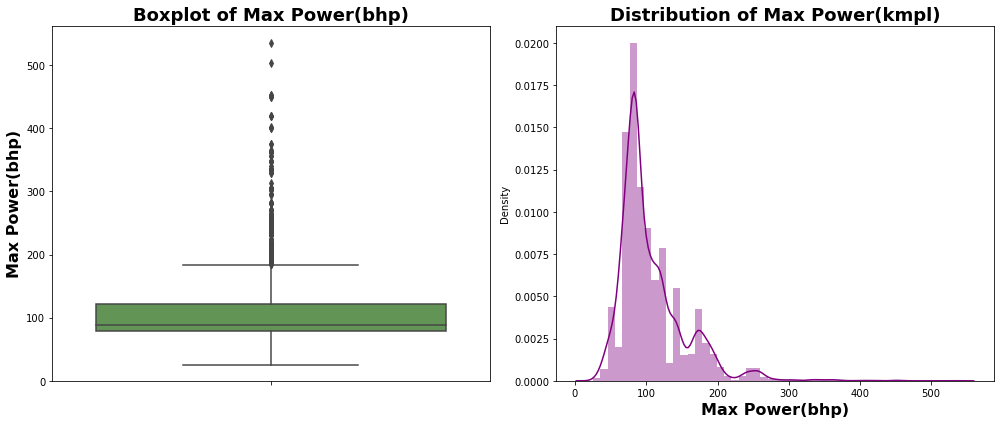

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Max Power(bhp)'], palette='gist_earth_r')
plt.title('Boxplot of Max Power(bhp)',fontweight ='bold', fontsize = 18)
plt.ylabel('Max Power(bhp)', fontweight ='bold', fontsize = 16 )
plt.subplot(1,2,2)
sns.distplot( x = df['Max Power(bhp)'],color ='Purple' )
plt.title('Distribution of Max Power(kmpl)',fontweight ='bold', fontsize = 18)
plt.xlabel('Max Power(bhp)',fontweight ='bold', fontsize = 16)
plt.tight_layout()
plt.show()

In [35]:
print("Mean of Max Power:",df['Max Power(bhp)'].mean(),'bhp')
print("Median of Max Power:",df['Max Power(bhp)'].median(),'bhp')

Mean of Max Power: 107.10451898409426 bhp
Median of Max Power: 88.7 bhp


- **Observation :**

    **1. Distribution of Max Power is right Skewed and from boxplot we can see presence of outliers.**

    **2. Mean is greater than median.**

**We gone imputate Max Power with Median as it is less sensitive to outliers.**

In [36]:
df['Max Power(bhp)'].fillna(df['Max Power(bhp)'].median(), inplace = True)

In [37]:
# Checking missing value after imputation
df.isnull().sum().any()

False

## Statistical Matrix

In [38]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
KMs driven,8500.000000,58694.130000,38015.893780,200.000000,32109.500000,54062.000000,78000.000000,800000.000000
Engine Displacement( ),8500.000000,1508.252353,542.440653,0.000000,1197.000000,1364.000000,1598.000000,5461.000000
Milage(kmpl),8500.000000,18.789699,3.807510,7.300000,16.550000,18.789699,21.100000,110.000000
Max Power(bhp),8500.000000,105.580192,45.631412,25.400000,81.800000,88.700000,121.300000,536.000000
Seating Capacity,8500.000000,5.192824,0.641265,2.000000,5.000000,5.000000,5.000000,10.000000
No of Cylinder,8500.000000,3.889176,0.492036,2.000000,4.000000,4.000000,4.000000,8.000000
Price (Rs.),8500.000000,941416.476235,1132622.793382,20000.000000,390000.000000,595000.000000,960000.000000,20800000.000000
Car_Age,8500.000000,6.226118,2.924782,0.000000,4.000000,5.000000,8.000000,18.000000


In [39]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Fuel Type,Gear Box,Steering Type,Turbo Charger,Super Charger,Brand,Model
count,8500,8500,8500,8500,8500,8500,8500
unique,5,38,5,4,2,34,237
top,Petrol,5 Speed,Power,No,No,Maruti,Swift
freq,5295,5712,7889,5600,8481,2105,570


# EDA 

### Exploring Fuel Type

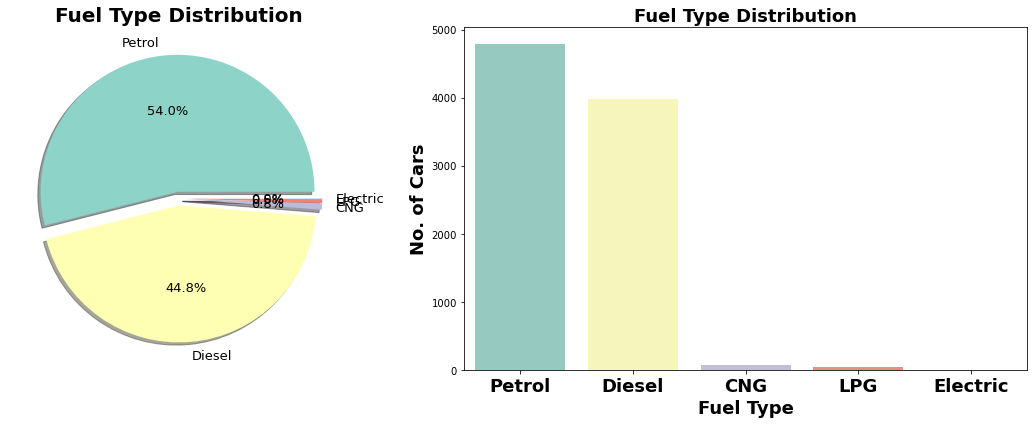

In [234]:
# Counting Fuel type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Fuel Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Fuel Type',data=df,ax=ax[1])
ax[1].set_title('Fuel Type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Fuel Type",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

- **Plot of Fuel Type Vs Price**

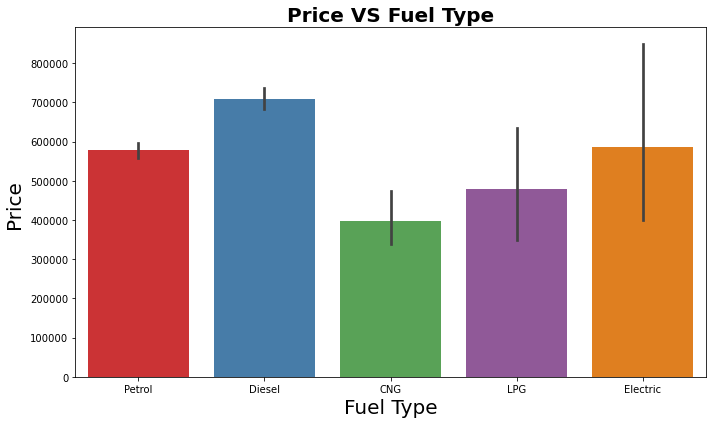

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Fuel Type'])
plt.title("Price VS Fuel Type",fontsize=20,fontweight ='bold')
plt.xlabel('Fuel Type',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are Petrol operated followed by Diesel. This may be due to low prices of Petrol car compare to diesel car.**
- **Very small segment of electric car and also price is quite high compare to petrol based.**
- **CNG based car are Cheapest compare to others.**

### Exploring Steering Type

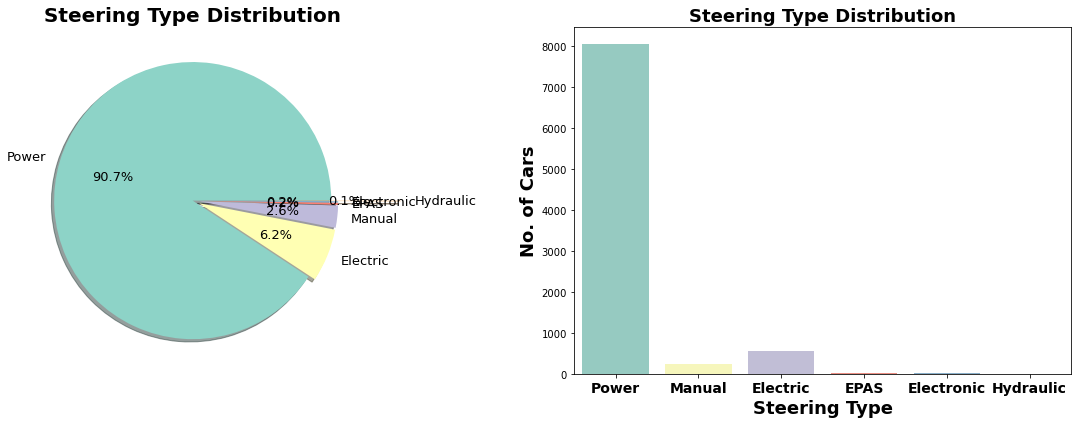

In [236]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Steering Type'].value_counts().plot.pie(explode=[0.0,0.05,0.05,0.05,0.05,0.5],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Steering Type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Steering Type',data=df,ax=ax[1])
ax[1].set_title('Steering Type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Steering Type",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

- **Price Vs Steering Type**

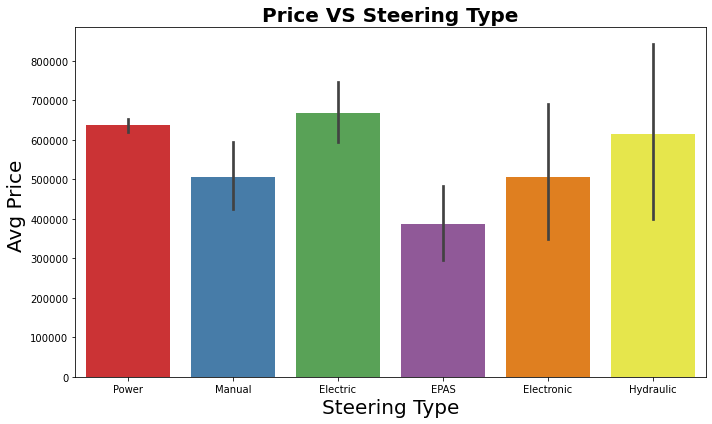

In [73]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Steering Type'])
plt.title("Price VS Steering Type",fontsize=20,fontweight ='bold')
plt.xlabel('Steering Type',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **More than 90 % of car users perfer Power steering compare to others.**
- **6.2% car based on electric steering, which is costly compare to others.**
- **Very small section of car still uses Manual Steering, Most probably they belong to old model.**

#### Let check predication in last point by ploting Car age Vs Price based on steering types.

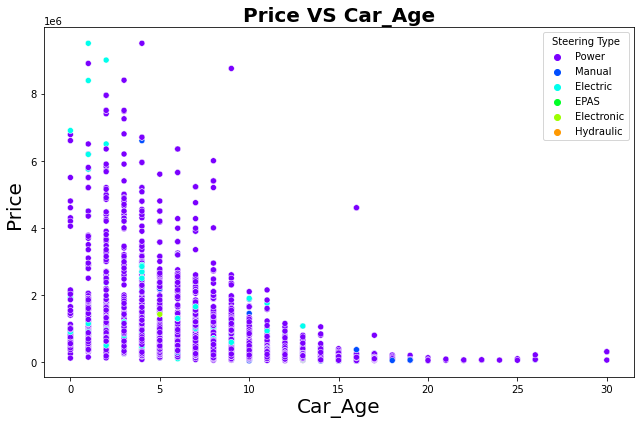

In [72]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Car_Age'], hue =df['Steering Type'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Here we got confirmation of prediction in previous section,**

***Almost all manual steering based car atleast 10 year old.***

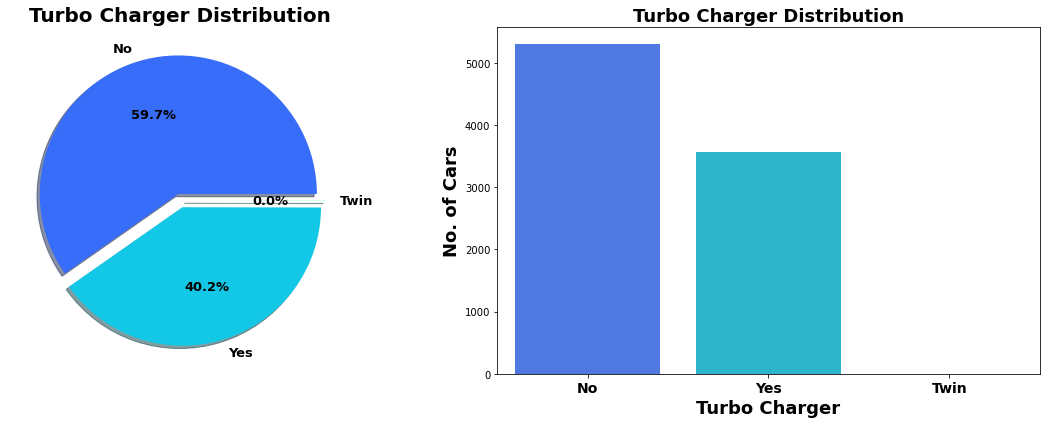

In [74]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Turbo Charger'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Turbo Charger Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Turbo Charger',data=df,ax=ax[1])
ax[1].set_title('Turbo Charger Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Turbo Charger",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

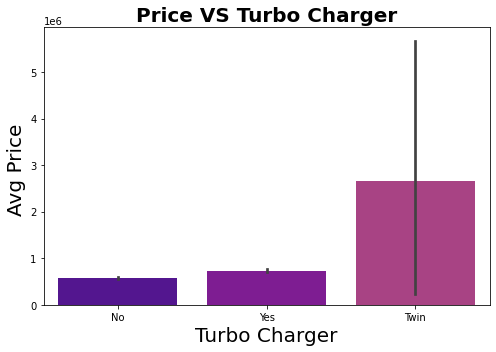

In [75]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
plt.figure(figsize =(7,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Turbo Charger'])
plt.title("Price VS Turbo Charger",fontsize=20,fontweight ='bold')
plt.xlabel('Turbo Charger',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **40% cars are with turbo charger & almost less than 1 % car with twin facility.**
- **As expected Max price for car based on Twin engine followed by with turbocharger.**

### Exploring Transmission

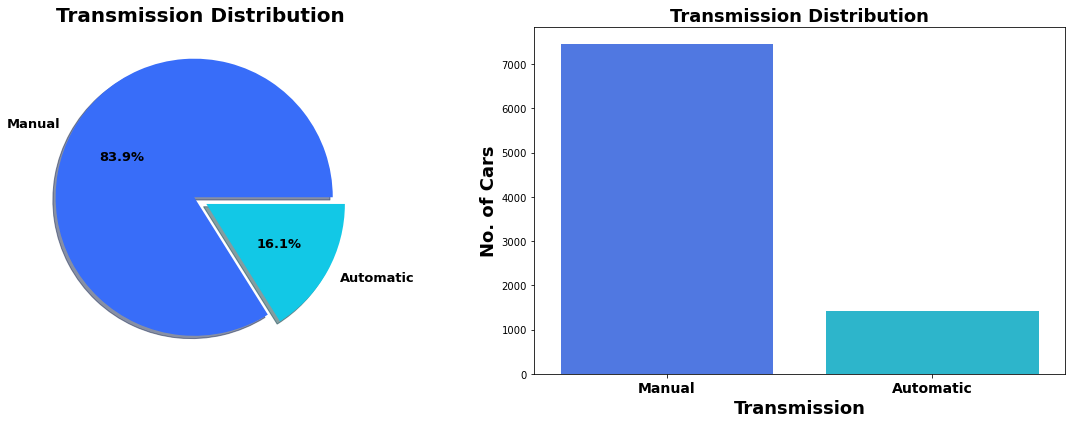

In [237]:
# Exploring Transmission
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Transmission'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Transmission Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Transmission',data=df,ax=ax[1])
ax[1].set_title('Transmission Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Transmission",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

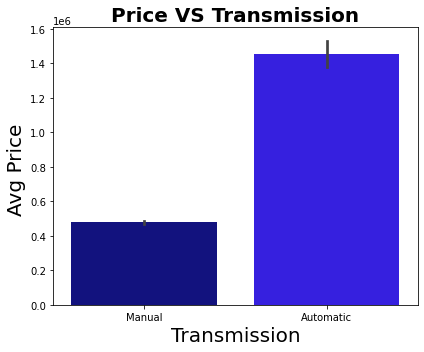

In [76]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(6,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Transmission'])
plt.title("Price VS Transmission",fontsize=20,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are with mannual transmission.**
- **The price of Automatic transmission is much greater than manual transmission.**

### Exploring Price Vs No of Cylinder

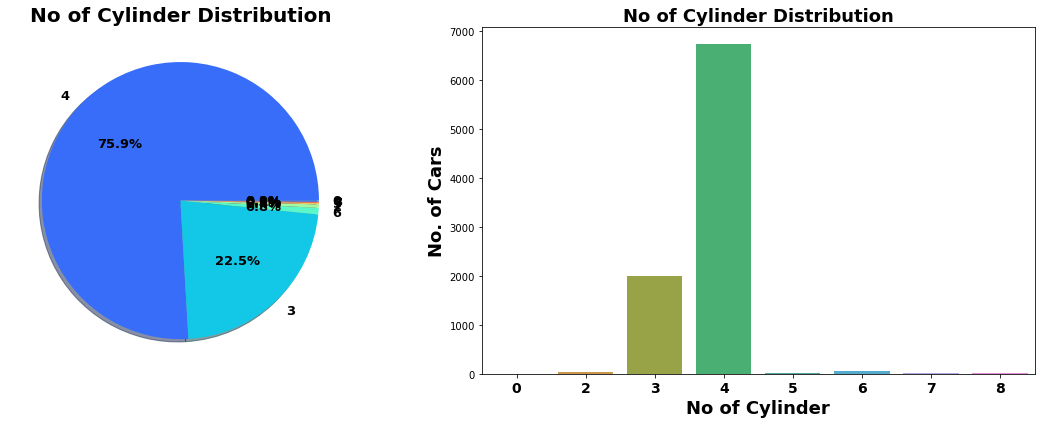

In [78]:
# Exploring Transmission
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['No of Cylinder'].value_counts().plot.pie(autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No of Cylinder Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('No of Cylinder',data=df,ax=ax[1])
ax[1].set_title('No of Cylinder Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("No of Cylinder",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

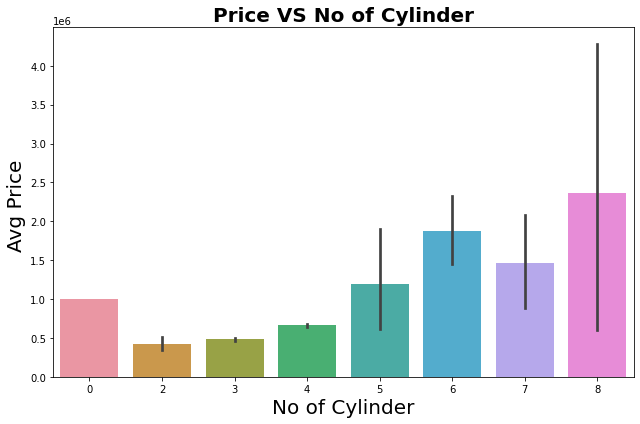

In [77]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(9,6))
sns.barplot(y=df['Price (Rs.)'],x=df['No of Cylinder'])
plt.title("Price VS No of Cylinder",fontsize=20,fontweight ='bold')
plt.xlabel('No of Cylinder',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of Cars with are 4 cylinder engines followed by 3 cylinder engines.**
- **In terms of Avg Price as number of cylinder increases the avgerage price increases.**

### Car Age Vs Avgerage Price

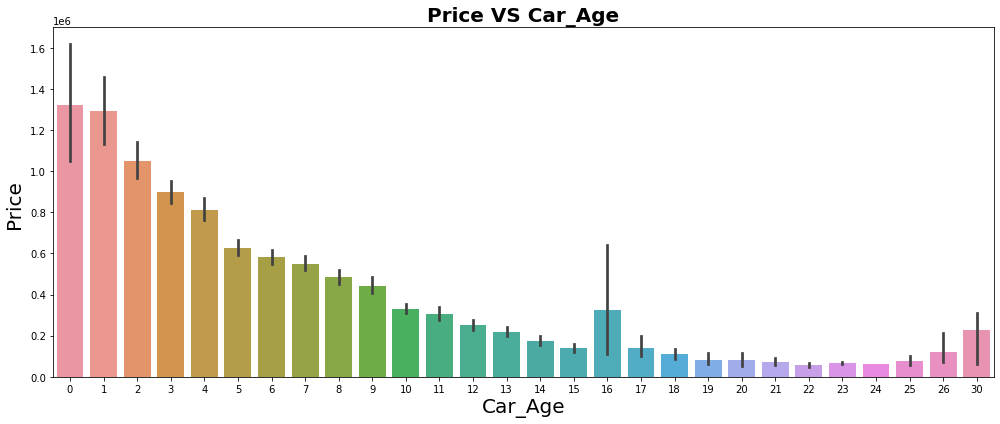

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(14,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Car_Age'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
**As car get older, price of car depricates.**

### Price VS Milage

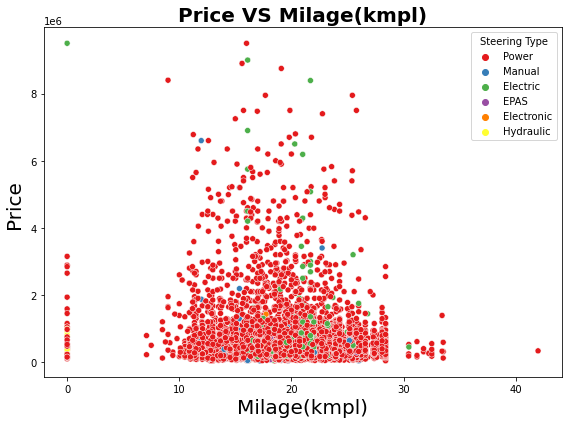

In [65]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Milage(kmpl)'],hue =df['Steering Type'])
plt.title("Price VS Milage(kmpl)",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Milage (kmpl) varies in between 10 to 25 kmpl for most of cars.**
**For Majority cars price is below 0.5e6.**
**We didn't get any other significant relation between price and steering types.**

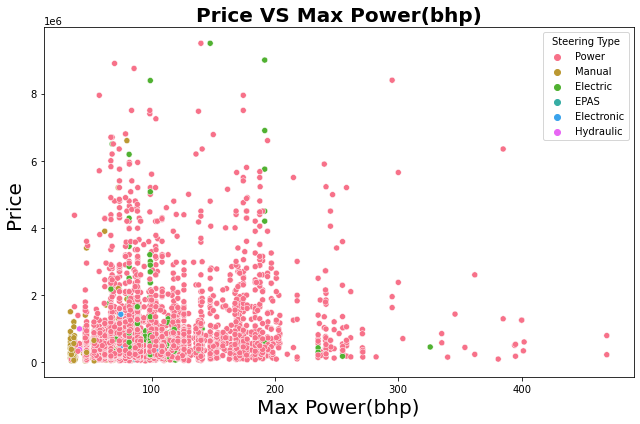

In [60]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Max Power(bhp)'], hue =df['Steering Type'])
plt.title("Price VS Max Power(bhp)",fontsize=20,fontweight ='bold')
plt.xlabel('Max Power(bhp)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Majority of cars have max power below 200 bhp.**

># Feature Enginnering

In [40]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['KMs driven', 'Engine Displacement( )'], float64: ['Milage(kmpl)', 'Max Power(bhp)', 'Seating Capacity', 'No of Cylinder', 'Price (Rs.)', 'Car_Age'], object: ['Fuel Type', 'Gear Box', 'Steering Type', 'Turbo Charger', 'Super Charger', 'Brand', 'Model']}

In [41]:
# Spliting data in Continous Numeric Variable.
Continous_Numerical_Features = ['KMs driven', 'Engine Displacement( )','Milage(kmpl)', 'Max Power(bhp)',
              'Price (Rs.)']

### 1. Outliers Detection and Removal

Outliers can exist in continous numerical features which can severely affect accuracy of prediction. In this 

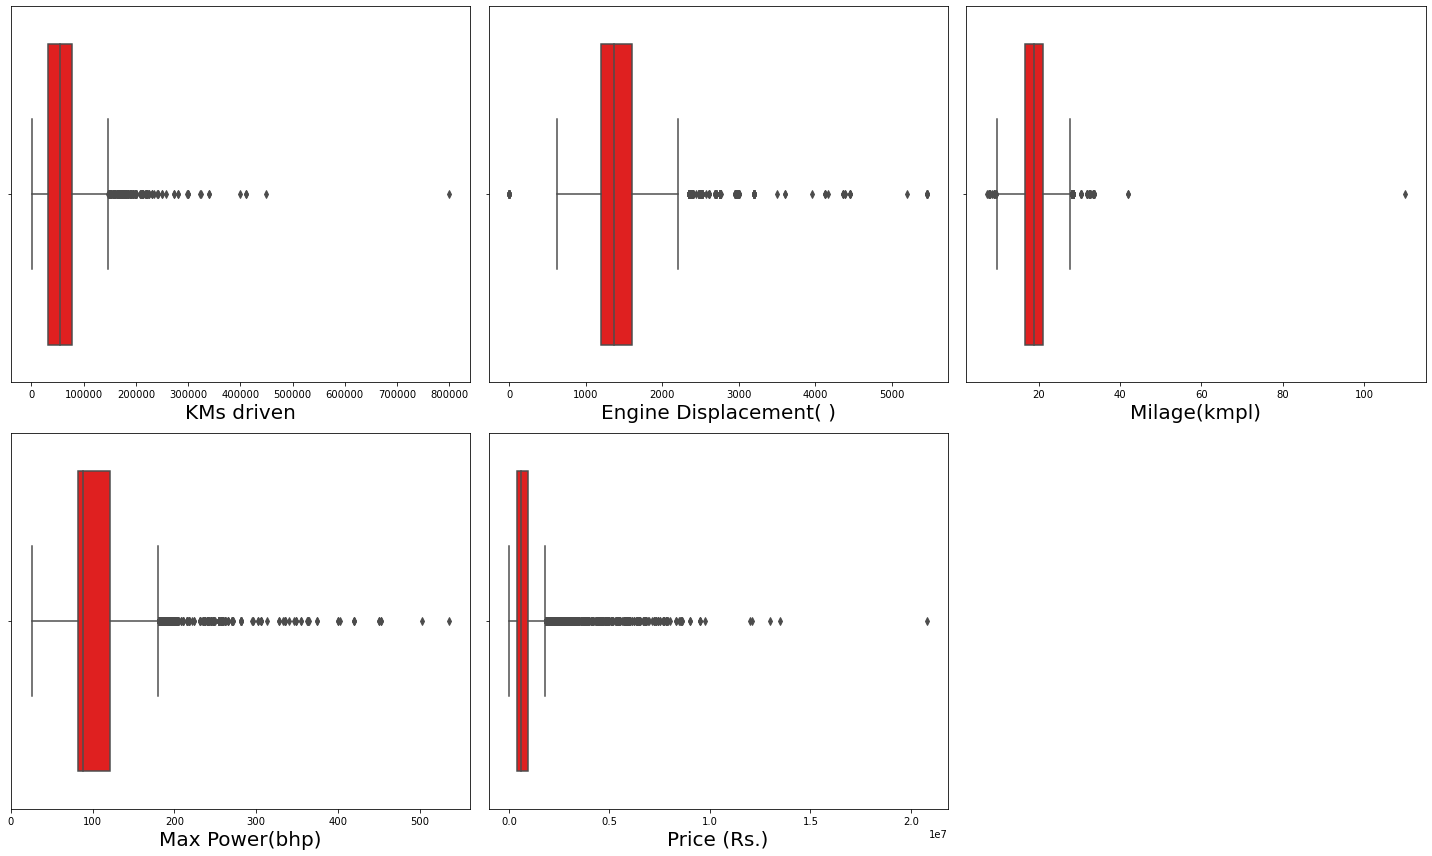

In [42]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[Continous_Numerical_Features]:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From above Boxplot we can easily see that outliers exist in dataset.**

In [43]:
df1=df.copy()

In [44]:
from scipy.stats import zscore
z = np.abs(zscore(df1[Continous_Numerical_Features]))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (8500, 15)
Shape of the dataframe after removing outliers:  (7907, 15)
Percentage of data loss post outlier removal:  6.976470588235293


**We have 6.97% of data Loss with Quantile-based Flooring and Capping Method which is within acceptable range.**

Since outliers are removed we can move further

In [45]:
data= df1

### 2. Skewness of features

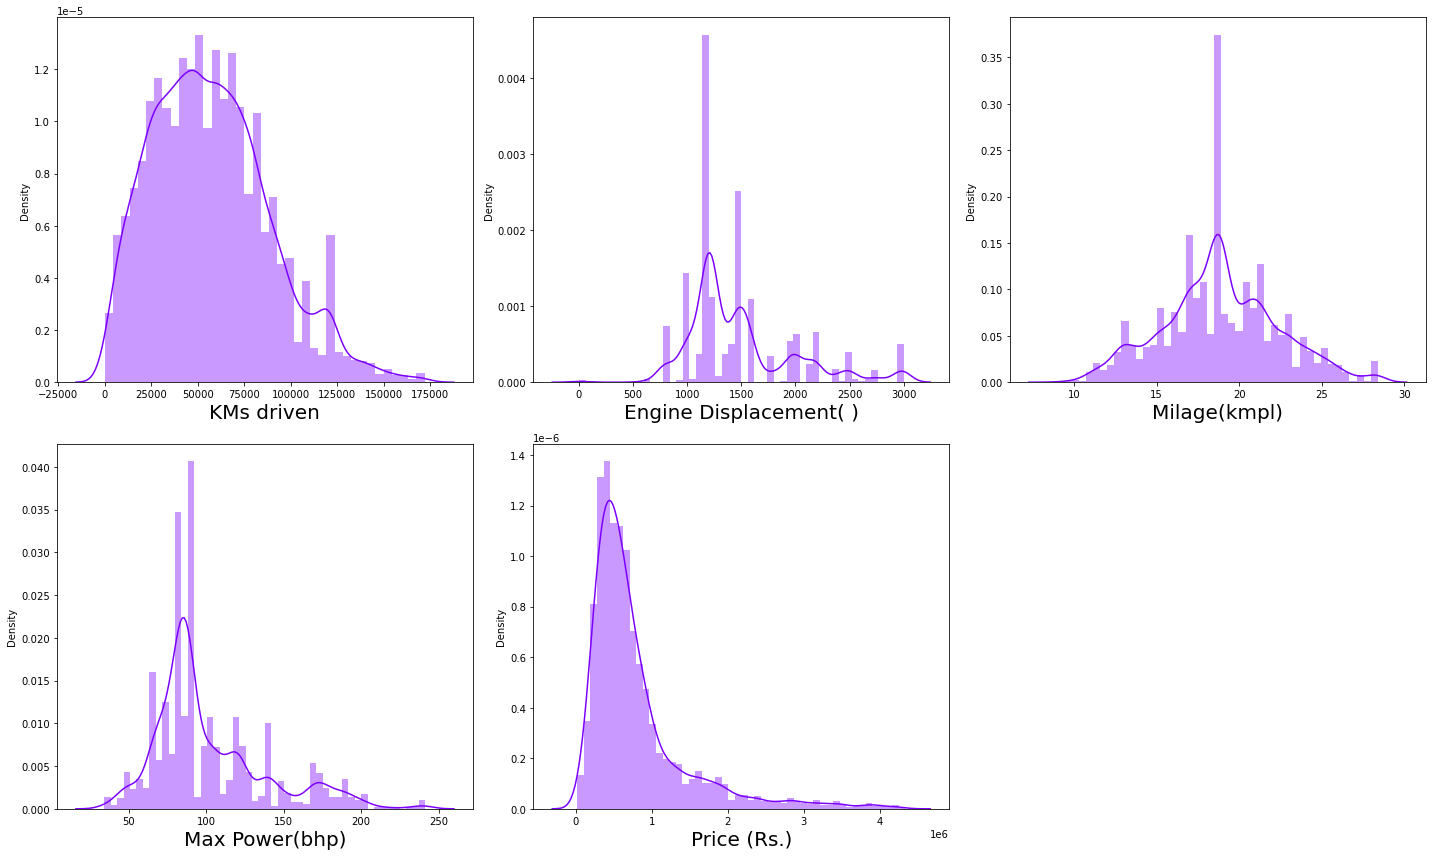

In [46]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
sns.set_palette('gist_rainbow_r')
for column in data[Continous_Numerical_Features]:
    if plotnumber<=22:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [47]:
data[Continous_Numerical_Features].skew()

KMs driven                0.581530
Engine Displacement( )    1.221445
Milage(kmpl)              0.126160
Max Power(bhp)            1.209963
Price (Rs.)               2.320947
dtype: float64

- **All features are skewed except Milage(kmpl).**

- **We will use PowerTransformer to transform skewness in features.**

- **We will not perform on Price as it is our Target Variable.**

In [48]:
skew_fea= ['KMs driven', 'Engine Displacement( )', 'Max Power(bhp)',]

In [49]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [50]:
data[skew_fea] = scaler.fit_transform(data[skew_fea].values)

In [51]:
data[Continous_Numerical_Features].skew()

KMs driven               -0.063747
Engine Displacement( )    0.348762
Milage(kmpl)              0.126160
Max Power(bhp)           -0.008645
Price (Rs.)               2.320947
dtype: float64

**Skewness of most of features is reduced.**

### 3. Correlation & VIF

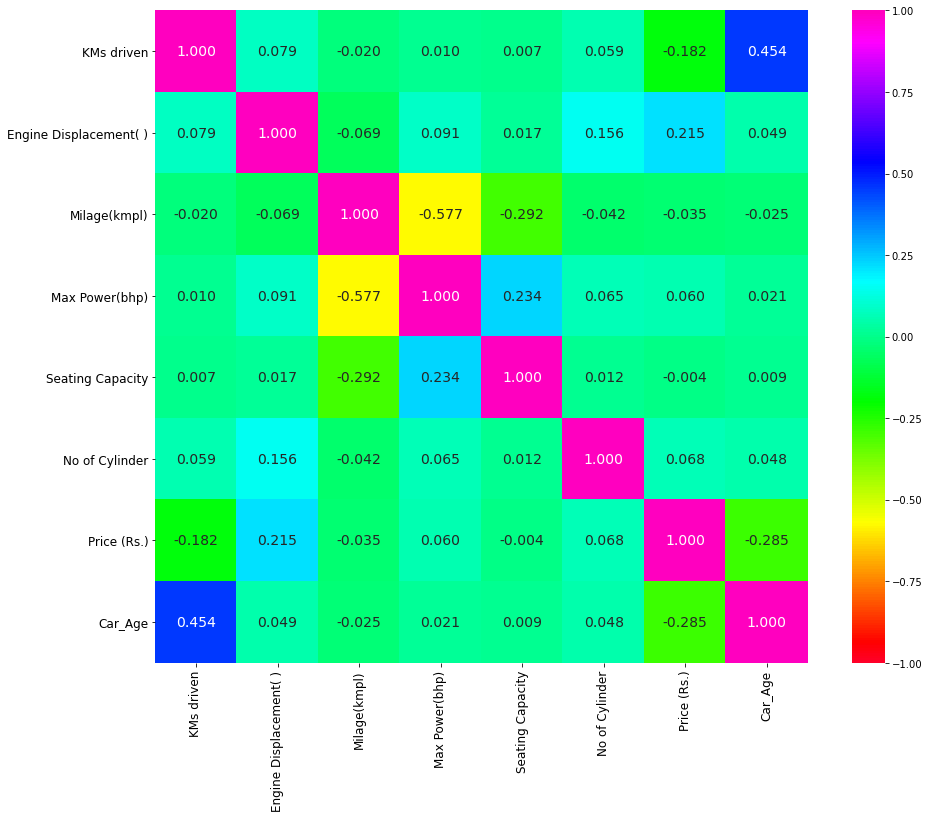

In [52]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':14}, cmap="gist_rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

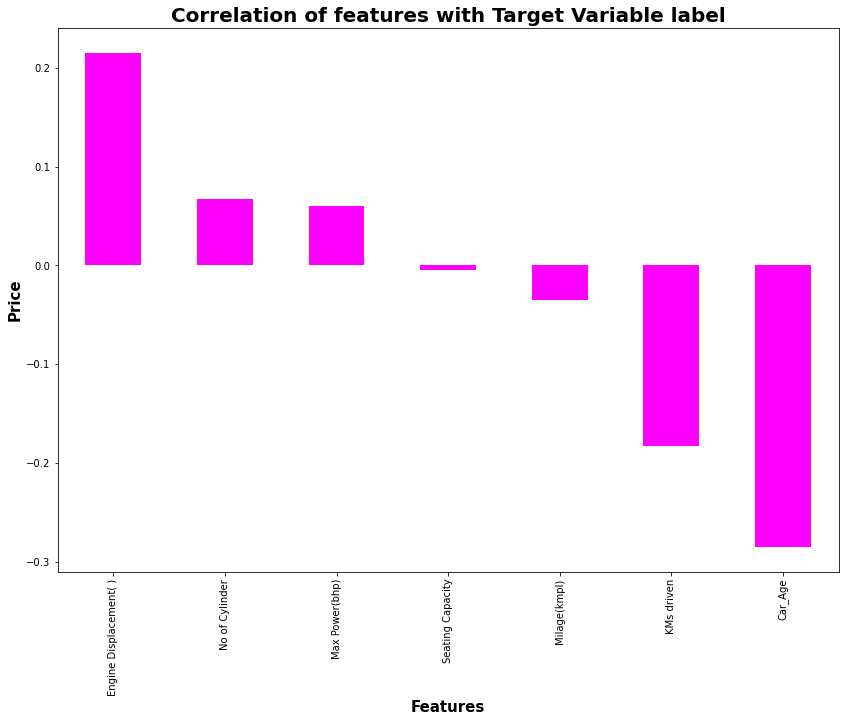

In [53]:
plt.figure(figsize = (14,10))
data.corr()['Price (Rs.)'].drop(['Price (Rs.)']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

### 4. Encoding Categorical Data 

In [54]:
Categorical = ['Fuel Type', 'Gear Box', 'Steering Type', 'Turbo Charger', 
               'Super Charger', 'Brand', 'Model']

In [55]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    data[i] = le.fit_transform(data[i])
data.head()

,Fuel Type,KMs driven,Engine Displacement( ),Milage(kmpl),Max Power(bhp),Seating Capacity,Gear Box,Steering Type,No of Cylinder,Turbo Charger,Super Charger,Brand,Model,Price (Rs.),Car_Age
0,4,-2.085197,-1.021968,21.7,-1.087707,5.0,2,4,3.0,0,0,17,152,475000.0,2.0
1,4,-0.708660,0.122528,17.4,0.634497,5.0,2,4,4.0,0,0,8,45,632000.0,8.0
2,1,-0.173015,0.124599,21.9,0.129628,7.0,5,4,4.0,3,0,8,28,874000.0,5.0
3,4,-0.569046,-0.535756,21.4,-0.393418,5.0,2,4,4.0,0,0,17,29,628000.0,4.0
4,4,0.524162,-0.535756,18.6,-0.441814,5.0,2,4,4.0,0,0,9,223,520000.0,7.0


In [71]:
df.shape

(7907, 14)

#### 6. Checking Multicollinearity between features using variance_inflation_factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif["Features"] = data.columns
vif

,VIF values,Features
0,9.089308,Fuel Type
1,1.290514,KMs driven
2,1.092360,Engine Displacement( )
3,36.665187,Milage(kmpl)
4,2.333904,Max Power(bhp)
5,48.824532,Seating Capacity
6,2.000469,Gear Box
7,22.234946,Steering Type
8,53.921828,No of Cylinder
9,3.427688,Turbo Charger


**We can see that multicollinearity exist between some features. So gone drop some features with high vif values.**

In [59]:
data.drop(columns=['Seating Capacity'], inplace = True)

In [61]:
data.drop(columns=['No of Cylinder'], inplace = True)

In [63]:
data.drop(columns=['Milage(kmpl)'], inplace = True)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif["Features"] = data.columns
vif

,VIF values,Features
0,7.519317,Fuel Type
1,1.263001,KMs driven
2,1.071669,Engine Displacement( )
3,1.497708,Max Power(bhp)
4,1.924033,Gear Box
5,13.041677,Steering Type
6,2.760619,Turbo Charger
7,1.006839,Super Charger
8,4.564247,Brand
9,3.723675,Model


### 5. Standard Scaling

In [65]:
# Splitting data in target and dependent feature
X = data.drop(['Price (Rs.)'], axis =1)
Y = data['Price (Rs.)']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [67]:
import pandas as pd
df = pd.DataFrame(X_scale, columns = X.columns)

In [68]:
df.head()

,Fuel Type,KMs driven,Engine Displacement( ),Max Power(bhp),Gear Box,Steering Type,Turbo Charger,Super Charger,Brand,Model,Car_Age
0,0.755383,-2.085197,-1.021968,-1.087707,-0.410046,0.27677,-0.706571,-0.038987,0.191652,0.723922,-1.471435
1,0.755383,-0.708660,0.122528,0.634497,-0.410046,0.27677,-0.706571,-0.038987,-0.925985,-0.958776,0.593946
2,-1.313481,-0.173015,0.124599,0.129628,0.094870,0.27677,1.417979,-0.038987,-0.925985,-1.226120,-0.438744
3,0.755383,-0.569046,-0.535756,-0.393418,-0.410046,0.27677,-0.706571,-0.038987,0.191652,-1.210394,-0.782974
4,0.755383,0.524162,-0.535756,-0.441814,-0.410046,0.27677,-0.706571,-0.038987,-0.801803,1.840478,0.249716


>## Machine Learning Model Building

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (5534, 11)
Training Target Vector Size : (5534,)
Test Feature Matrix Size: (2373, 11)
Test Target Vector Size: (2373,)


### **Random Forest Regressor**

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state= 508, test_size=0.25)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 148597.87885685381
Mean squared error : 67611297049.177605
Root Mean squared error : 260021.7241869948
R2 Score of Random Forest Regressor :
83.70084411662025


In [94]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, df, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7599000062960121
Difference in R2 & CV Score: 11.39941197381414


### **Decision Tree Regressor**

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state= 508, test_size=0.25)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 184496.20789074356
Mean squared error : 135394804572.58624
Root Mean squared error : 367960.33016153553
R2 Score of Decision Tree Regressor :
67.3601731982279


In [95]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5866777179169846
Difference in R2 & CV Score: 28.721640811716888


### **Extra Trees Regressor**

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 508, test_size=0.25)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 168699.62428932727
Mean squared error : 81600372789.09512
Root Mean squared error : 285657.78965240053
R2 Score of Extra Tree Regressor :
80.3284768333321


In [96]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, df, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7497155135294303
Difference in R2 & CV Score: 12.417861250472313


### **XGB Regressor**

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 508, test_size=0.25)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 141404.6654683153
Mean squared error : 52310572187.63793
Root Mean squared error : 228715.04582698082
R2 Score of XGB Regressor :
87.38941260341535


In [97]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, df, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.814658604514891
Difference in R2 & CV Score: 5.923552151926245


## **Hyper Parameter Tuning : GridSearchCV**

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
print(xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [100]:
parameter = {'n_estimators':[50,100,125],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'learning_rate' : [0.01, 0.1,0.3,0.5,1] }

In [101]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [102]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 1/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-0.270 total time=   0.2s
[CV 2/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 2/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-0.279 total time=   0.1s
[CV 3/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 3/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-0.288 total time=   0.1s
[CV 4/5; 1/360] START booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50
[CV 4/5; 1/360] END booster=gbtree, gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=50;, score=-0.293 total time=   0.1s
[CV 5/5; 1/360] START bo

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=N

In [104]:
GCV.best_params_

{'booster': 'gbtree',
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 125}

## Final Regression Model

In [105]:
Final_mod =  XGBRegressor(n_estimators=125 , booster= 'gbtree', learning_rate= 0.3, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 140685.0761229728
Mean squared error : 51989008868.76832
Root Mean Squared Error: 228010.98409674986


 R2 Score of Final Model :
0.8746693235069694




## Saving Final Model

In [106]:
import joblib
joblib.dump(Final_mod,'Used_car_Price_Prediction.pkl')

['Used_car_Price_Prediction.pkl']

In [108]:
# Loading the saved model
Model = joblib.load("Used_car_Price_Prediction.pkl")

# prediction on X_Test Data
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,984000.0,9.636834e+05
1,145000.0,3.365674e+05
2,675000.0,6.140816e+05
3,300000.0,2.625149e+05
4,626000.0,6.853286e+05
...,...,...
1972,520000.0,4.882213e+05
1973,537000.0,6.361991e+05
1974,435000.0,5.492818e+05
1975,1577000.0,1.392856e+06
